In [21]:
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import pandas_datareader as web

start = dt.datetime(2020,1,1)
end = dt.datetime(2020,4,5)

main_df = pd.DataFrame()
tickers = ['PETR4.SA']

for ticker in tickers:
    df = web.DataReader(ticker, 'yahoo', start, end)  
    main_df['{}'.format(ticker)] = df['Close'].round(4)
    main_df['Volume'] = df['Volume'].round(0)

main_df.head()

,PETR4.SA,Volume
Date,,
2020-01-02,30.70,37774500.0
2020-01-03,30.45,71595600.0
2020-01-06,30.81,81844000.0
2020-01-07,30.69,32822000.0
2020-01-08,30.50,48215600.0


In [40]:
database = pd.DataFrame(index=main_df.index)
database = main_df.copy()

database['sma'] = database['PETR4.SA'].rolling(5).mean()
database['volume_bb'] = database['Volume'].rolling(5).mean() + database['Volume'].rolling(5).std()

database.drop(columns=['upper_bb', 'lower_bb', 'std'], inplace=True)

database.head()

,PETR4.SA,Volume,sma,volume_bb
Date,,,,
2020-01-02,30.70,37774500.0,NaN,NaN
2020-01-03,30.45,71595600.0,NaN,NaN
2020-01-06,30.81,81844000.0,NaN,NaN
2020-01-07,30.69,32822000.0,NaN,NaN
2020-01-08,30.50,48215600.0,30.63,7.583441e+07


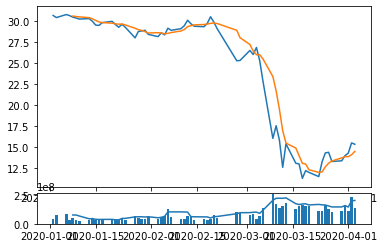

In [42]:
ax1 = plt.subplot2grid((6,1), (0,0), rowspan=5, colspan=1)
ax2 = plt.subplot2grid((6,1), (5,0), rowspan=1, colspan=1, sharex=ax1)

ax1.plot(database.index, database['PETR4.SA'])
ax1.plot(database.index, database['sma'])
ax2.bar(database.index, database['Volume'])
ax2.plot(database.index, database['volume_bb'])

plt.show()